In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("data.xlsx", index_col= 'State')
data

,GDPin$millions,Population,Unemployment rate %
State,,,
North Dakota,52089,757952,2.4
Alabama,204861,4863300,3.8
Mississippi,107680,2988726,5.2
Arkansas,120689,2988248,3.5
Kansas,153258,2907289,3.8
Georgia,525360,10310371,4.5
Iowa,178766,3134693,3.2
West Virginia,73374,1831102,5.1
Kentucky,197043,4436974,5.2


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, North Dakota to Tennessee
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GDPin$millions       10 non-null     object 
 1   Population           10 non-null     int64  
 2   Unemployment rate %  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes
None


In above data, GDP is Dependant variable and population, Unemployment rate are independent variable

#### Our goal is to fit a linear model to the data so that we can predict the GDP of Tennessee, using a linear model

In [4]:
# We begin by centering and normalizing the data
import numpy as np
avg_Y = np.average(data['GDPin$millions'][0:9])
avg_x1 = np.average(data['Population'][0:9])
avg_x2 = np.average(data['Unemployment rate %'][0:9])

In [5]:
print(avg_Y, avg_x1, avg_x2)

179235.55555555556 3802072.777777778 4.077777777777778


In [6]:
std_Y = np.std(data['GDPin$millions'][0:9])
std_x1 = np.std(data['Population'][0:10])
std_x2 = np.std(data['Unemployment rate %'][0:10])

In [7]:
print(std_Y, std_x1, std_x2)

132233.70121376534 2586779.1891990104 0.9413288479590967


<Axes: xlabel='State'>

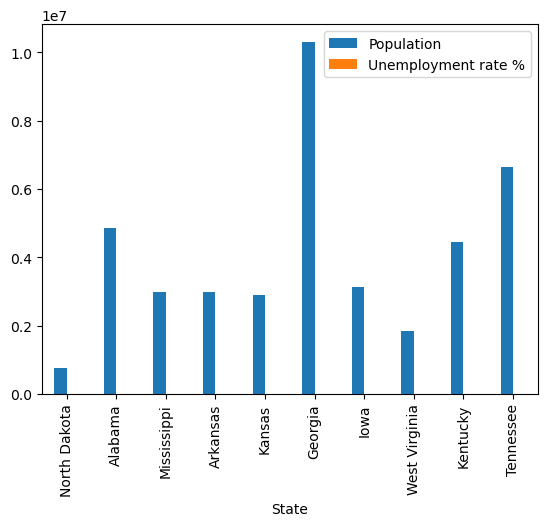

In [8]:
import matplotlib.pyplot as plt
data.plot(kind = 'bar')

## from above graph we can see data need to be Normalize

<Axes: xlabel='State'>

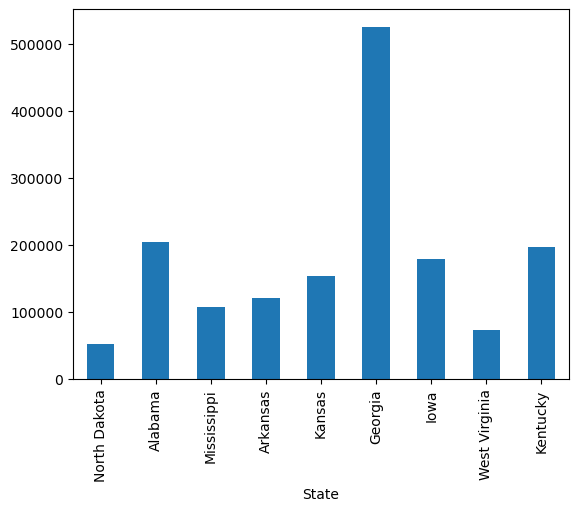

In [9]:
data['GDPin$millions'][0:9].plot(kind = 'bar')

<Axes: xlabel='State'>

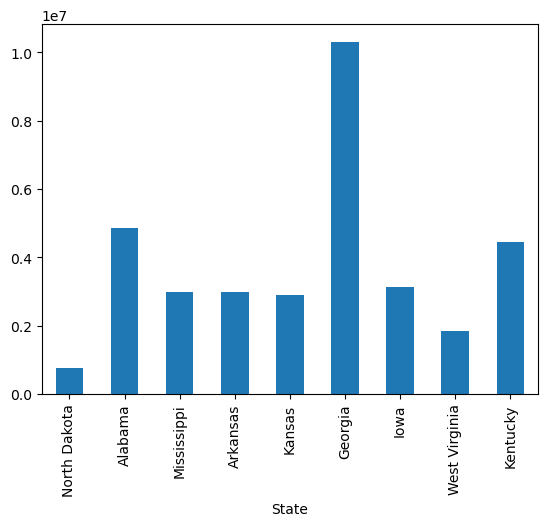

In [10]:
data['Population'][0:9].plot(kind = 'bar')

<Axes: xlabel='State'>

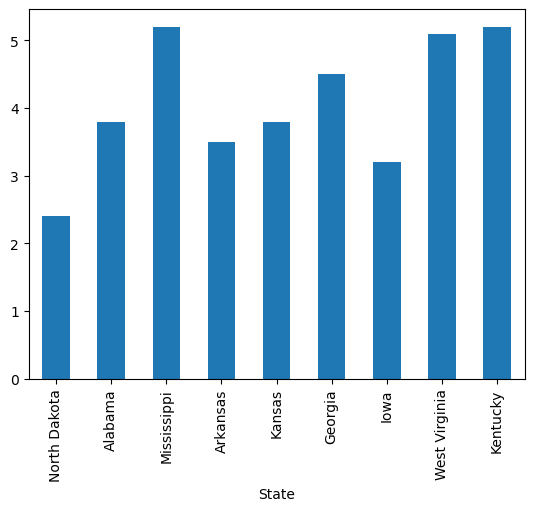

In [11]:
data['Unemployment rate %'][0:9].plot(kind = 'bar')

In [12]:
# copy the data
df_max_scaled = data[0:9].copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
NormData = df_max_scaled      
# view normalized data
display(NormData)

,GDPin$millions,Population,Unemployment rate %
State,,,
North Dakota,0.099149,0.073514,0.461538
Alabama,0.389944,0.471690,0.730769
Mississippi,0.204964,0.289876,1.000000
Arkansas,0.229726,0.289829,0.673077
Kansas,0.29172,0.281977,0.730769
Georgia,1.0,1.000000,0.865385
Iowa,0.340273,0.304033,0.615385
West Virginia,0.139664,0.177598,0.980769
Kentucky,0.375063,0.430341,1.000000


<Axes: xlabel='State'>

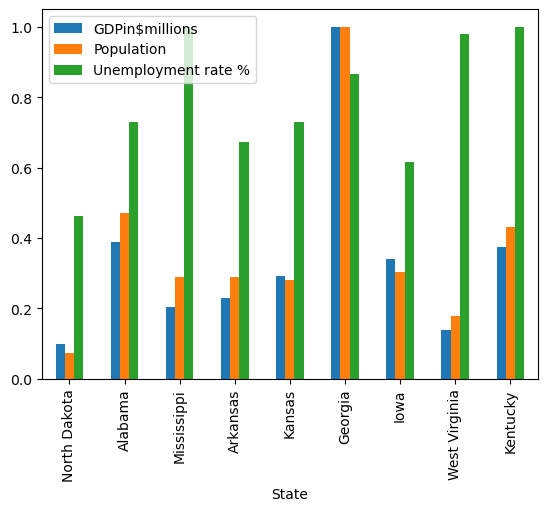

In [13]:
NormData.plot(kind = 'bar')

In [21]:
from sklearn import linear_model

X_var = NormData[['Population', 'Unemployment rate %']]
y_var = NormData[['GDPin$millions']]

regr = linear_model.LinearRegression()
regr.fit(X_var, y_var)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
# predictedCO2 = regr.predict([[2300, 1300]])

# print(predictedCO2)

LinearRegression()

In [24]:
predicted_GDP = regr.predict([[0.430341, 1.000000]])
predicted_GDP

C:\Users\ajitw\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.37084952]])